## Árvores de decisão 

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor ). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, o estatístico e biólogo Fisher desenvolveu um modelo discriminante linear para distinguir as espécies umas das outras.

Mais informações aqui: [kaggle](https://www.kaggle.com/uciml/iris)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import files
upload = files.upload()

Saving iris.csv to iris.csv
Saving iris_teste.csv to iris_teste.csv
Saving iris_treino.csv to iris_treino.csv
Saving iris_validacao.csv to iris_validacao.csv


In [ ]:
df= pd.read_csv('iris.csv')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
df['species'].unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df['species_num'] = np.where(df['species'] == 'Iris-setosa', 0, np.where(df['species'] == 'Iris-virginica', 1, 2))

In [ ]:
df['species_num'].value_counts()

0    50
2    50
1    50
Name: species_num, dtype: int64

In [ ]:
df_train, df_test = train_test_split(df, 
                                     test_size=30, 
                                     shuffle=True, 
                                     stratify=df['species'], 
                                     random_state=42)

In [ ]:
df_train, df_valid = train_test_split(df_train, 
                                      test_size=30, 
                                      shuffle=True, 
                                      stratify=df_train['species'],
                                      random_state=46)

In [ ]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(90, 6)
(30, 6)
(30, 6)


In [ ]:
df_train.to_csv('iris_treino.csv', index=False)
df_valid.to_csv('iris_validacao.csv', index=False)
df_test.to_csv('iris_teste.csv', index=False)

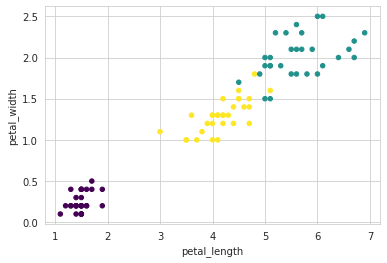

In [ ]:
df_train.plot.scatter(x='petal_length', y='petal_width', c='species_num', cmap='viridis', colorbar=None)
plt.show()

In [ ]:
df_valid = pd.read_csv('iris_validacao.csv')
df_teste = pd.read_csv('iris_teste.csv')

In [ ]:
df_treino = pd.read_csv('iris_treino.csv')

In [ ]:
df_treino.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.3,Iris-setosa,0
1,4.8,3.0,1.4,0.1,Iris-setosa,0
2,5.9,3.0,4.2,1.5,Iris-versicolor,2
3,5.6,2.7,4.2,1.3,Iris-versicolor,2
4,7.1,3.0,5.9,2.1,Iris-virginica,1


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species       90 non-null     object 
 5   species_num   90 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.3+ KB


In [ ]:
df_treino.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.846667,3.072222,3.766667,1.184444,1.000000
std,0.824240,0.460832,1.784515,0.758756,0.821071
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.725000,1.525000,0.400000,0.000000
50%,5.700000,3.000000,4.200000,1.300000,1.000000
75%,6.300000,3.400000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X_train = df_treino[['petal_length','petal_width']]
y_train = df_treino[['species_num']]

X_valid = df_valid[['petal_length','petal_width']]
y_valid = df_valid[['species_num']]

X_test = df_teste[['petal_length','petal_width']]
y_test = df_teste[['species_num']]

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.80      0.80        10
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

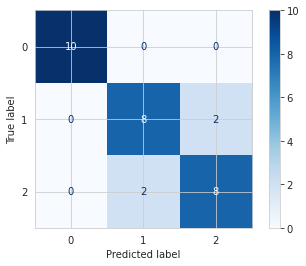

In [ ]:
cm = confusion_matrix(y_valid, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()

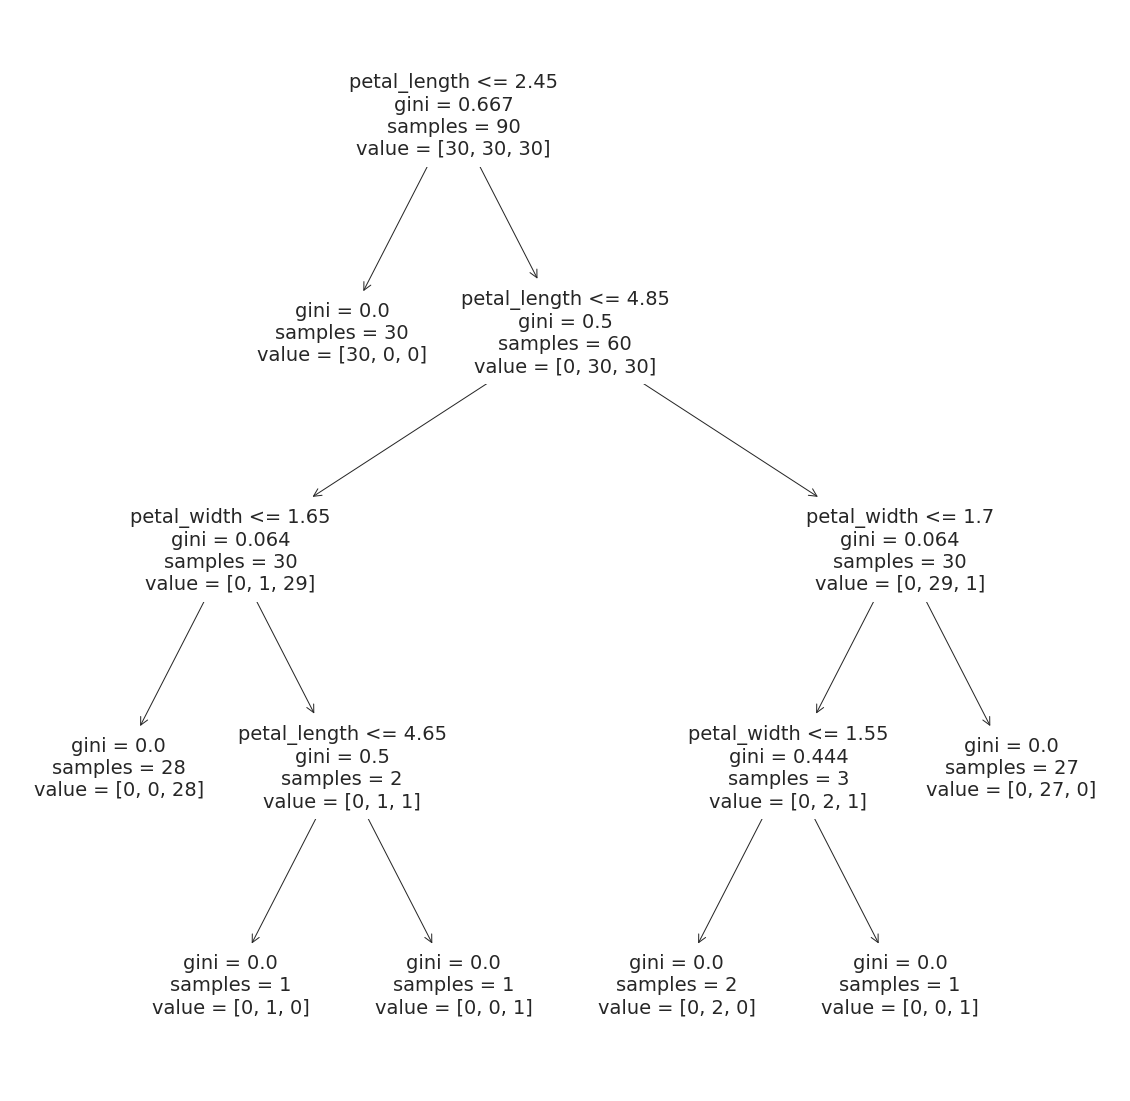

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=X_train.columns)
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



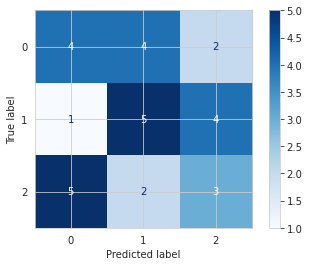

In [ ]:
cm = confusion_matrix(y_valid, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.show()

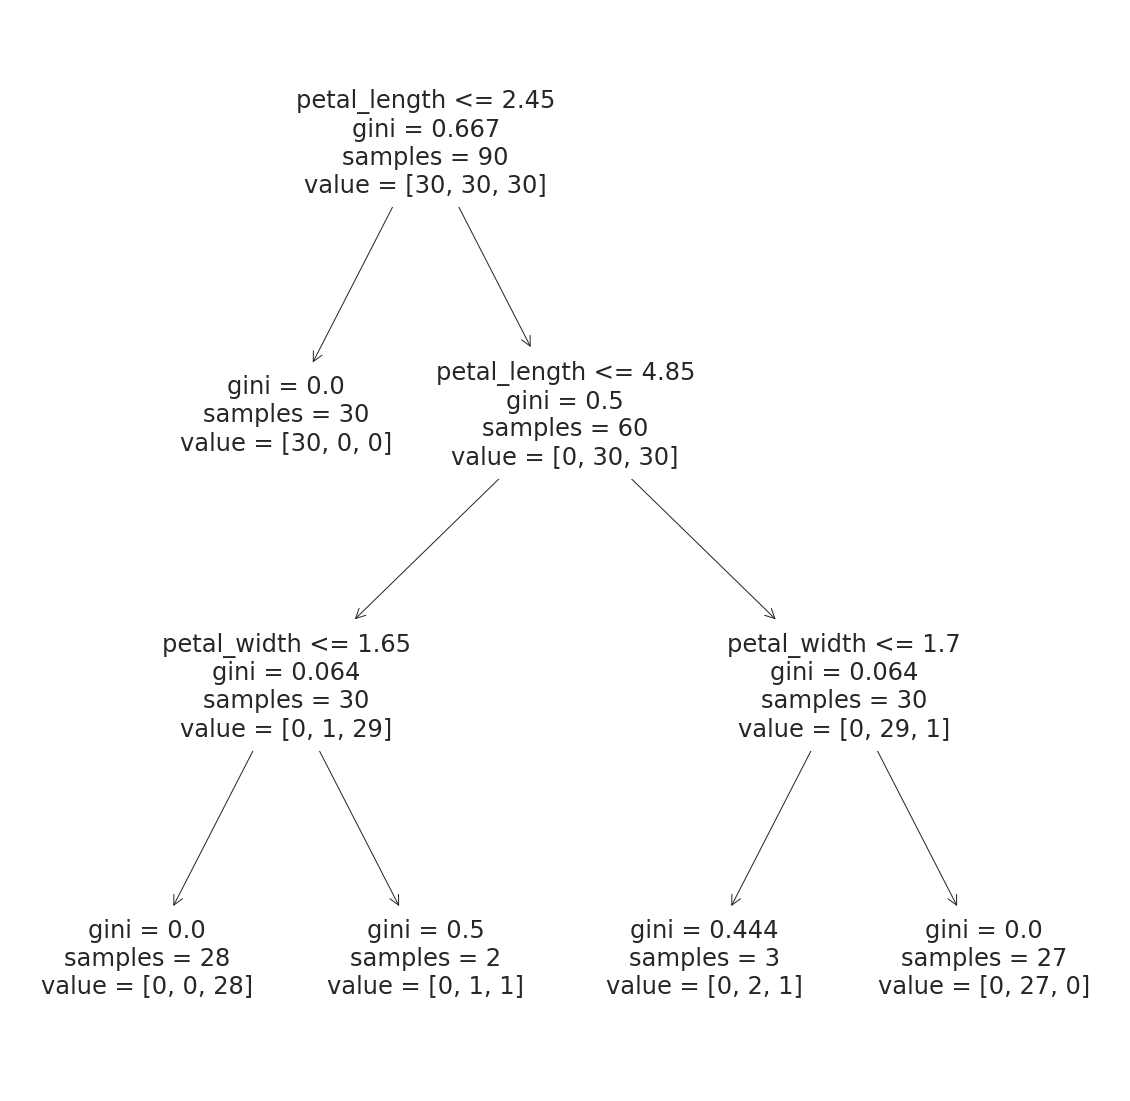

In [ ]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=X_train.columns)
plt.show()

In [ ]:
import itertools

def plot_classification_model_2d(x_range, y_range, model, resolution=200):
    x_vals = np.linspace(x_range[0], x_range[1], resolution)
    y_vals = np.linspace(y_range[0], y_range[1], resolution)    
    
    points = np.array(list(itertools.product(x_vals, y_vals)))
    
    labels = model.predict(points)
    
    xx = points[:,0].reshape(resolution, resolution)
    yy = points[:,1].reshape(resolution, resolution)
    
    # Ajustando os contornos para o desenho final
    Z = labels.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')